In [2]:
import pandas as pd
import os

# Set the path to your Uber dataset folder
data_folder = './Uber dataset/'

# List of 2014 monthly files
uber_files = [
    'uber-raw-data-apr14.csv',
    'uber-raw-data-may14.csv',
    'uber-raw-data-jun14.csv',
    'uber-raw-data-jul14.csv',
    'uber-raw-data-aug14.csv',
    'uber-raw-data-sep14.csv'
]

# Load and combine all CSV files
dfs = [pd.read_csv(os.path.join(data_folder, file)) for file in uber_files]
uber_data = pd.concat(dfs, ignore_index=True)

# Convert 'Date/Time' to datetime
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])

# Extract useful time features
uber_data['Hour'] = uber_data['Date/Time'].dt.hour
uber_data['Day'] = uber_data['Date/Time'].dt.day
uber_data['Weekday'] = uber_data['Date/Time'].dt.dayofweek
uber_data['Month'] = uber_data['Date/Time'].dt.month

# Display first few rows
uber_data.head()


,Date/Time,Lat,Lon,Base,Hour,Day,Weekday,Month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,1,1,4
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,1,1,4
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,1,1,4
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,1,1,4
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,1,1,4


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7064\3270028603.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=uber_data, palette='viridis')


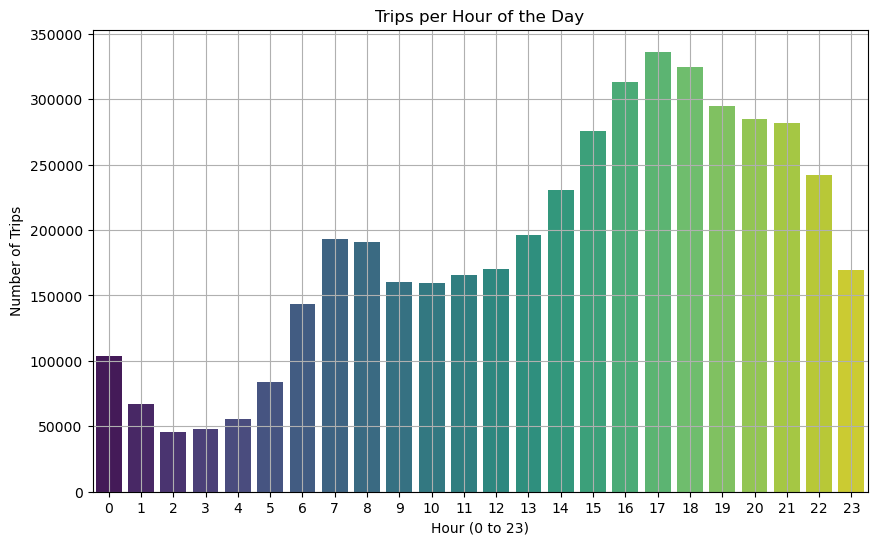

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=uber_data, palette='viridis')
plt.title('Trips per Hour of the Day')
plt.xlabel('Hour (0 to 23)')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7064\4185748903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekday', data=uber_data, palette='coolwarm')


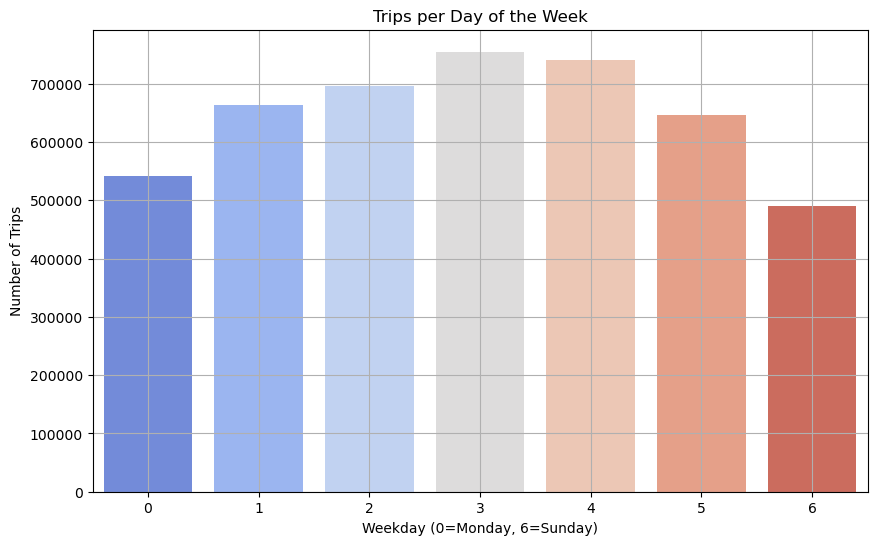

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weekday', data=uber_data, palette='coolwarm')
plt.title('Trips per Day of the Week')
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7064\1505465492.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Base', data=uber_data, palette='Set2')


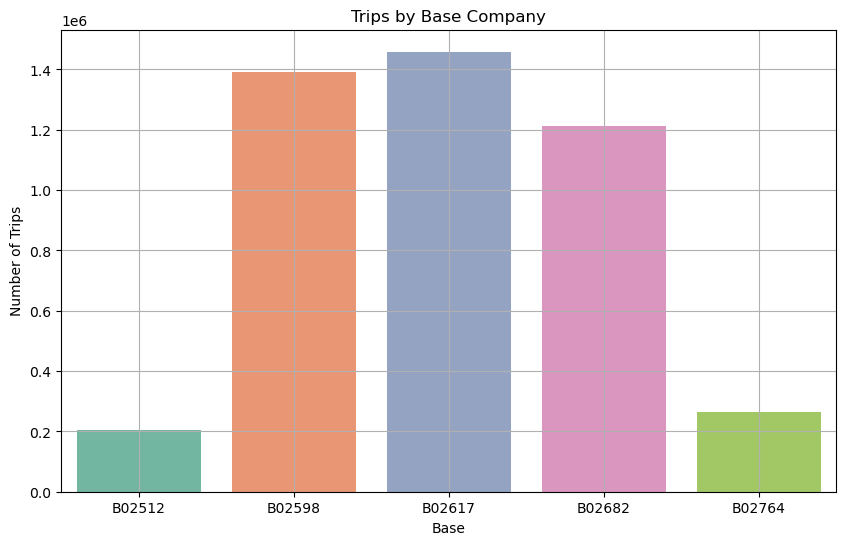

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Base', data=uber_data, palette='Set2')
plt.title('Trips by Base Company')
plt.xlabel('Base')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()


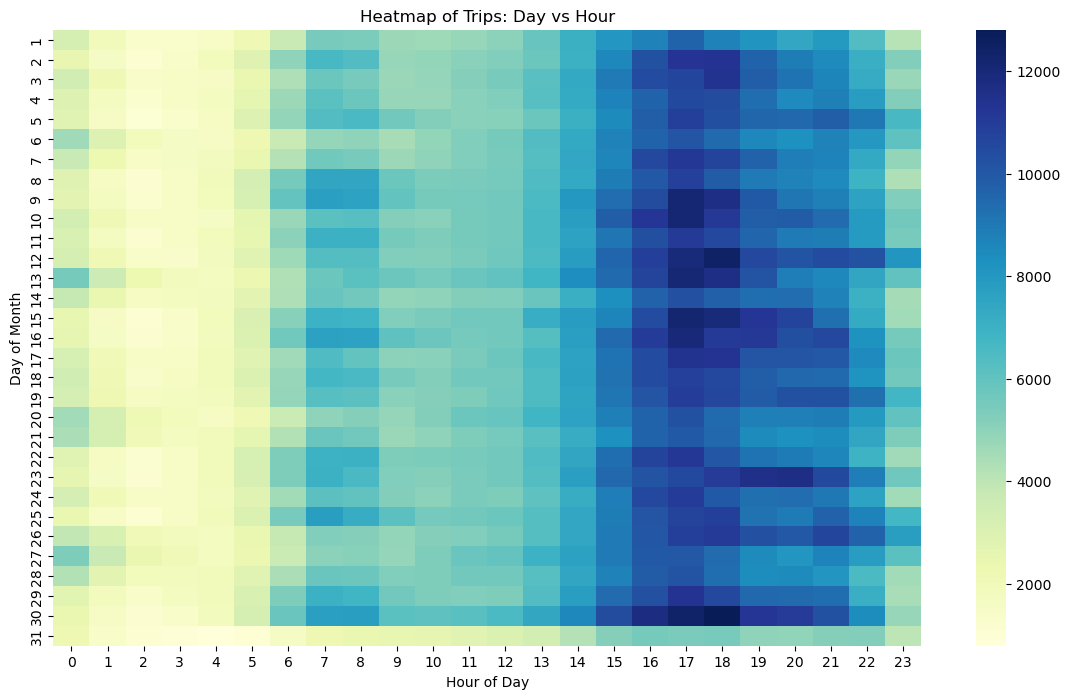

In [10]:
# Create pivot table
heatmap_data = uber_data.groupby(['Day', 'Hour']).size().unstack()

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title('Heatmap of Trips: Day vs Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Month')
plt.show()


In [12]:
# Set Date/Time as index
uber_data.set_index('Date/Time', inplace=True)

# Group by hour and count number of trips
hourly_data = uber_data.resample('H').size().to_frame(name='Trip Count')

hourly_data.head()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7064\920894549.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = uber_data.resample('H').size().to_frame(name='Trip Count')


,Trip Count
Date/Time,
2014-04-01 00:00:00,138
2014-04-01 01:00:00,66
2014-04-01 02:00:00,53
2014-04-01 03:00:00,93
2014-04-01 04:00:00,166


In [14]:
# Reset index to get Date column
hourly_data.reset_index(inplace=True)

# Create features again
hourly_data['Hour'] = hourly_data['Date/Time'].dt.hour
hourly_data['Day'] = hourly_data['Date/Time'].dt.day
hourly_data['Weekday'] = hourly_data['Date/Time'].dt.dayofweek
hourly_data['Month'] = hourly_data['Date/Time'].dt.month

hourly_data.head()


,Date/Time,Trip Count,Hour,Day,Weekday,Month
0,2014-04-01 00:00:00,138,0,1,1,4
1,2014-04-01 01:00:00,66,1,1,1,4
2,2014-04-01 02:00:00,53,2,1,1,4
3,2014-04-01 03:00:00,93,3,1,1,4
4,2014-04-01 04:00:00,166,4,1,1,4


In [16]:
# Features to use
X = hourly_data[['Hour', 'Day', 'Weekday', 'Month']]

# Target variable
y = hourly_data['Trip Count']


In [18]:
from sklearn.model_selection import train_test_split

# Split 70% train / 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [22]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 24760.67
R² Score: 0.94


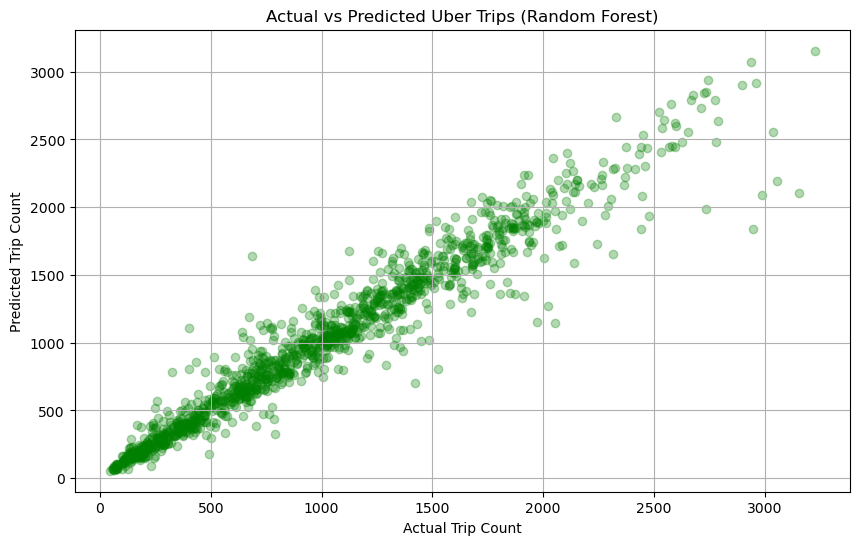

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='green')
plt.xlabel('Actual Trip Count')
plt.ylabel('Predicted Trip Count')
plt.title('Actual vs Predicted Uber Trips (Random Forest)')
plt.grid(True)
plt.show()


In [26]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 8.4 MB/s eta 0:00:18
    --------------------------------------- 2.9/150.0 MB 7.3 MB/s eta 0:00:21
   - -------------------------------------- 4.2/150.0 MB 7.0 MB/s eta 0:00:21
   - -------------------------------------- 5.5/150.0 MB 7.0 MB/s eta 0:00:21
   - -------------------------------------- 6.8/150.0 MB 6.9 MB/s eta 0:00:21
   -- ------------------------------------- 8.4/150.0 MB 6.8 MB/s eta 0:00:21
   -- ------------------------------------- 9.7/150.0 MB 6.9 MB/s eta 0:00:21
   -- ------------------------------------- 11.0/150.0 MB 6.8 MB/s eta 0:00:21
   --- ------------------------------------ 12.3/150.0 MB 6.8 MB/s eta 0:00:21
   --- ------------------------------------ 13.9/150.0 MB 6.8 MB/s eta 0:00:21
   ---- ----------------------------------- 15.2/150.0 MB 6.7 MB/s eta 0:00:21
   ---- ----------------------------------- 16.5/150.0 MB 6.8 MB/s 

In [27]:
import xgboost as xgb
from xgboost import XGBRegressor


In [28]:
# Initialize model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train model
xgb_model.fit(X_train, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test)


In [32]:
from sklearn.metrics import mean_squared_error, r2_score

xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print(f"XGBoost MSE: {xgb_mse:.2f}")
print(f"XGBoost R² Score: {xgb_r2:.2f}")


XGBoost MSE: 18693.38
XGBoost R² Score: 0.95


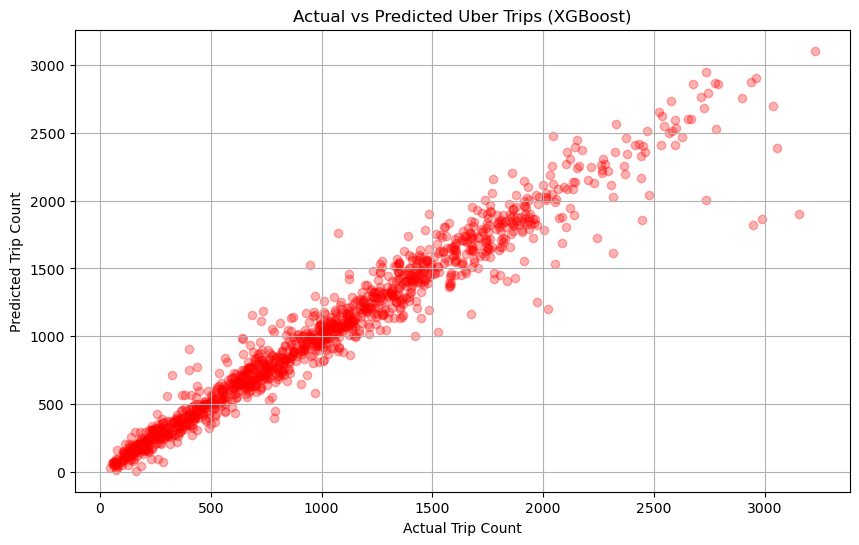

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, xgb_pred, alpha=0.3, color='red')
plt.xlabel('Actual Trip Count')
plt.ylabel('Predicted Trip Count')
plt.title('Actual vs Predicted Uber Trips (XGBoost)')
plt.grid(True)
plt.show()


In [36]:
ensemble_pred = 0.5 * xgb_pred + 0.5 * y_pred  # You can tune weights


In [38]:
import joblib
joblib.dump(xgb_model, 'uber_xgboost_model.pkl')


['uber_xgboost_model.pkl']

In [40]:
import joblib

# Re-save the model in a way that's compatible with Streamlit
joblib.dump(xgb_model, 'uber_xgboost_model.pkl')


['uber_xgboost_model.pkl']

In [42]:
import xgboost as xgb
import joblib

# Recreate the model from scratch using same training data
clean_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
clean_model.fit(X_train, y_train)

# Save this "clean" model for use in Streamlit
joblib.dump(clean_model, 'uber_xgboost_model.pkl')


['uber_xgboost_model.pkl']